In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer,KNNImputer

In [10]:
df = pd.read_csv('Pricehouse.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceU
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [12]:
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

In [14]:
le = LabelEncoder()
df['AddressEncoded'] = le.fit_transform(df['Address'])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceU,AddressEncoded
0,63,1,1,1,1,Shahran,1850000000,61666.67,156
1,60,1,1,1,1,Shahran,1850000000,61666.67,156
2,79,2,1,1,1,Pardis,550000000,18333.33,117
3,95,2,1,1,1,Shahrake Qods,902500000,30083.33,152
4,123,2,1,1,1,Shahrake Gharb,7000000000,233333.33,150
...,...,...,...,...,...,...,...,...,...
3454,86,2,1,1,1,Southern Janatabad,3500000000,116666.67,163
3455,83,2,1,1,1,Niavaran,6800000000,226666.67,105
3456,75,2,0,0,0,Parand,365000000,12166.67,115
3457,105,2,1,1,1,Dorous,5600000000,186666.67,39


In [16]:
X = df[['Area','Room','Parking','Warehouse','Elevator','AddressEncoded']]
y = df[['PriceU']]

In [18]:
X.info()
y['PriceU'] = df['PriceU'].astype('int64')
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            3459 non-null   object
 1   Room            3459 non-null   int64 
 2   Parking         3459 non-null   int32 
 3   Warehouse       3459 non-null   int32 
 4   Elevator        3459 non-null   int32 
 5   AddressEncoded  3459 non-null   int32 
dtypes: int32(4), int64(1), object(1)
memory usage: 108.2+ KB


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9180\4242613499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['PriceU'] = df['PriceU'].astype('int64')


,Area,Room,Parking,Warehouse,Elevator,AddressEncoded
0,63,1,1,1,1,156
1,60,1,1,1,1,156
2,79,2,1,1,1,117
3,95,2,1,1,1,152
4,123,2,1,1,1,150
...,...,...,...,...,...,...
3454,86,2,1,1,1,163
3455,83,2,1,1,1,105
3456,75,2,0,0,0,115
3457,105,2,1,1,1,39


In [20]:
X['Area'] = X['Area'].replace([' ',','],'',regex=True)
X['Area'] = X['Area'].apply(lambda x: int(x))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9180\334094165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Area'] = X['Area'].replace([' ',','],'',regex=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9180\334094165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Area'] = X['Area'].apply(lambda x: int(x))


In [60]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
y = pd.DataFrame(imputer.fit_transform(y),columns = y.columns)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
from sklearn.preprocessing import MinMaxScaler
normalizer= MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [82]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_pred.astype('int64')

array([[ 171153],
       [ 448434],
       [ 356616],
       [ 144638],
       [ -10224],
       [ 355451],
       [ 151369],
       [ 184893],
       [ 349377],
       [ 351022],
       [  72388],
       [ -67930],
       [  -7889],
       [-240512],
       [ 212026],
       [ 144075],
       [ 153581],
       [ -24133],
       [ -17031],
       [ 377858],
       [ 150597],
       [ 119320],
       [ 184893],
       [ 154768],
       [ 180138],
       [ 120155],
       [ 181363],
       [ -43027],
       [ 159239],
       [ 135353],
       [ 153861],
       [ -54029],
       [ 306932],
       [ 156035],
       [ 129317],
       [ 161050],
       [ 172759],
       [ 133216],
       [  -8529],
       [ 116662],
       [1133917],
       [ -17148],
       [ 139603],
       [ 155798],
       [ 149690],
       [ 177150],
       [ 168266],
       [ 186948],
       [ 128360],
       [ 104436],
       [ 222516],
       [ -38971],
       [ -43116],
       [   1497],
       [ 126121],
       [ 1

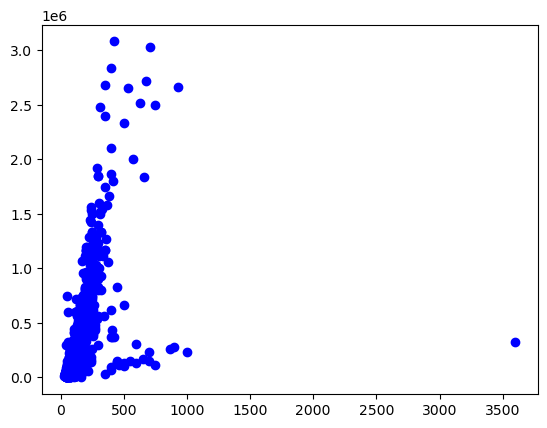

In [84]:
plt.scatter(X['Area'],y['PriceU'],color='blue')
plt.show()

In [86]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.42945866647818376


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


[3.2029344747313773, 10.281645573205909, 9.882131863697612, 10.628985757587124, 5.7654563201911175, 4.312105482938633]
